## ALL Disaster Images ##

## Discussions ##

### Looking at the heatmap, the model does not perform as well on 1s as on 0s considering on the diagonal, the 1s is darker. On the error plot, the column for class 0 is quite bright, which tells that many images get missclassified as 0s. The model performs better when only the last layer is fine-tuned with test set accuracy of 84.057% compared to 82.119% when more layers are fine-tuned. This is an indication that the pre-trained NasNet model is similar to our dataset as the higher layers represent more specific object features. ###

### The dataset size is not a representative of how well the model performs. The highest test-set accuracies are not necessarily the largest dataset size ###

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
from sklearn.metrics import confusion_matrix

## Load data ##

In [6]:
train_dir = 'data_all/train'
validation_dir = 'data_all/validation'
test_dir = 'data_all/test'

In [7]:
train_damaged_dir = os.path.join(train_dir, 'damaged')  # directory with our training damaged pictures
train_undamaged_dir = os.path.join(train_dir, 'undamaged')  # directory with our training undamaged pictures
validation_damaged_dir = os.path.join(validation_dir, 'damaged')  # directory with our validation damaged pictures
validation_undamaged_dir = os.path.join(validation_dir, 'undamaged')  # directory with our validation undamaged pictures
test_damaged_dir = os.path.join(test_dir, 'damaged')  # directory with our test damaged pictures
test_undamaged_dir = os.path.join(test_dir, 'undamaged')  # directory with our test undamaged pictures


## Understand the data ##

### Let's look at how many damaged and undamaged images are in the training and validation directory: ###

In [8]:
num_damaged_tr = len(os.listdir(train_damaged_dir))
num_undamaged_tr = len(os.listdir(train_undamaged_dir))

num_damaged_val = len(os.listdir(validation_damaged_dir))
num_undamaged_val = len(os.listdir(validation_undamaged_dir))

num_damaged_ts = len(os.listdir(test_damaged_dir))
num_undamaged_ts = len(os.listdir(test_undamaged_dir))

total_train = num_damaged_tr + num_undamaged_tr
total_val = num_damaged_val + num_undamaged_val
total_test = num_damaged_ts + num_undamaged_ts

In [9]:
print('total training damaged images:', num_damaged_tr)
print('total training undamaged images:', num_undamaged_tr)

print('total validation damaged images:', num_damaged_val)
print('total validation undamaged images:', num_undamaged_val)

print('total test damaged images:', num_damaged_ts)
print('total test undamaged images:', num_undamaged_ts)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training damaged images: 9164
total training undamaged images: 6328
total validation damaged images: 3055
total validation undamaged images: 2111
total test damaged images: 3053
total test undamaged images: 2109
--
Total training images: 15492
Total validation images: 5166
Total test images: 5162


In [10]:
# set up variables
batch_size = 128
#epochs = 5
#IMG_HEIGHT = 150
#IMG_WIDTH = 150

# VGG19, VGG16, Inception
#IMG_HEIGHT = 224
#IMG_WIDTH = 224

# inceptionV3
#IMG_HEIGHT = 299
#IMG_WIDTH = 299


IMG_HEIGHT = 331
IMG_WIDTH = 331

## Data preparation ##

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 15492 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 5166 images belonging to 2 classes.


In [14]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 5162 images belonging to 2 classes.


## Visualize training images ##

In [15]:
sample_training_images, _ = next(train_data_gen)

In [16]:
sample_training_images, labels = next(train_data_gen)

In [17]:
labels

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
sample_training_images, labels = next(train_data_gen)

In [19]:
labels

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0.], dtype=float32)

In [20]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

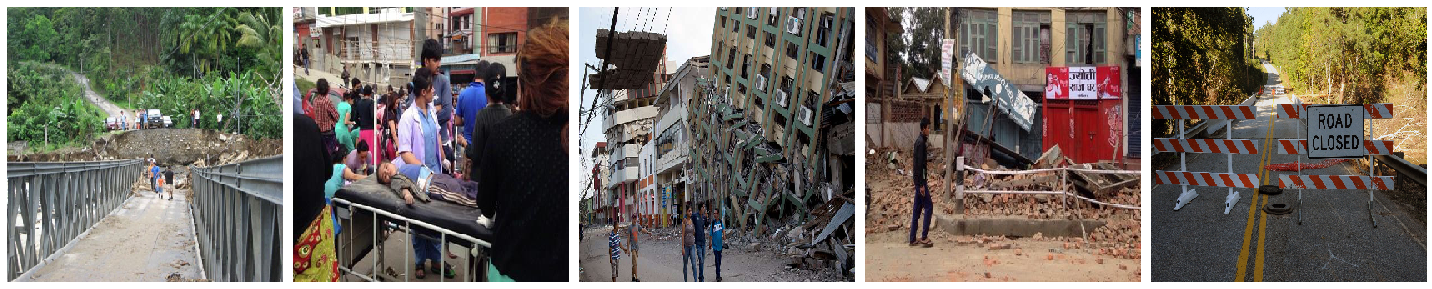

In [21]:
plotImages(sample_training_images[:5])

In [22]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(40,40))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.title(label_batch[n], fontdict={'fontsize':28})
      plt.axis('off')

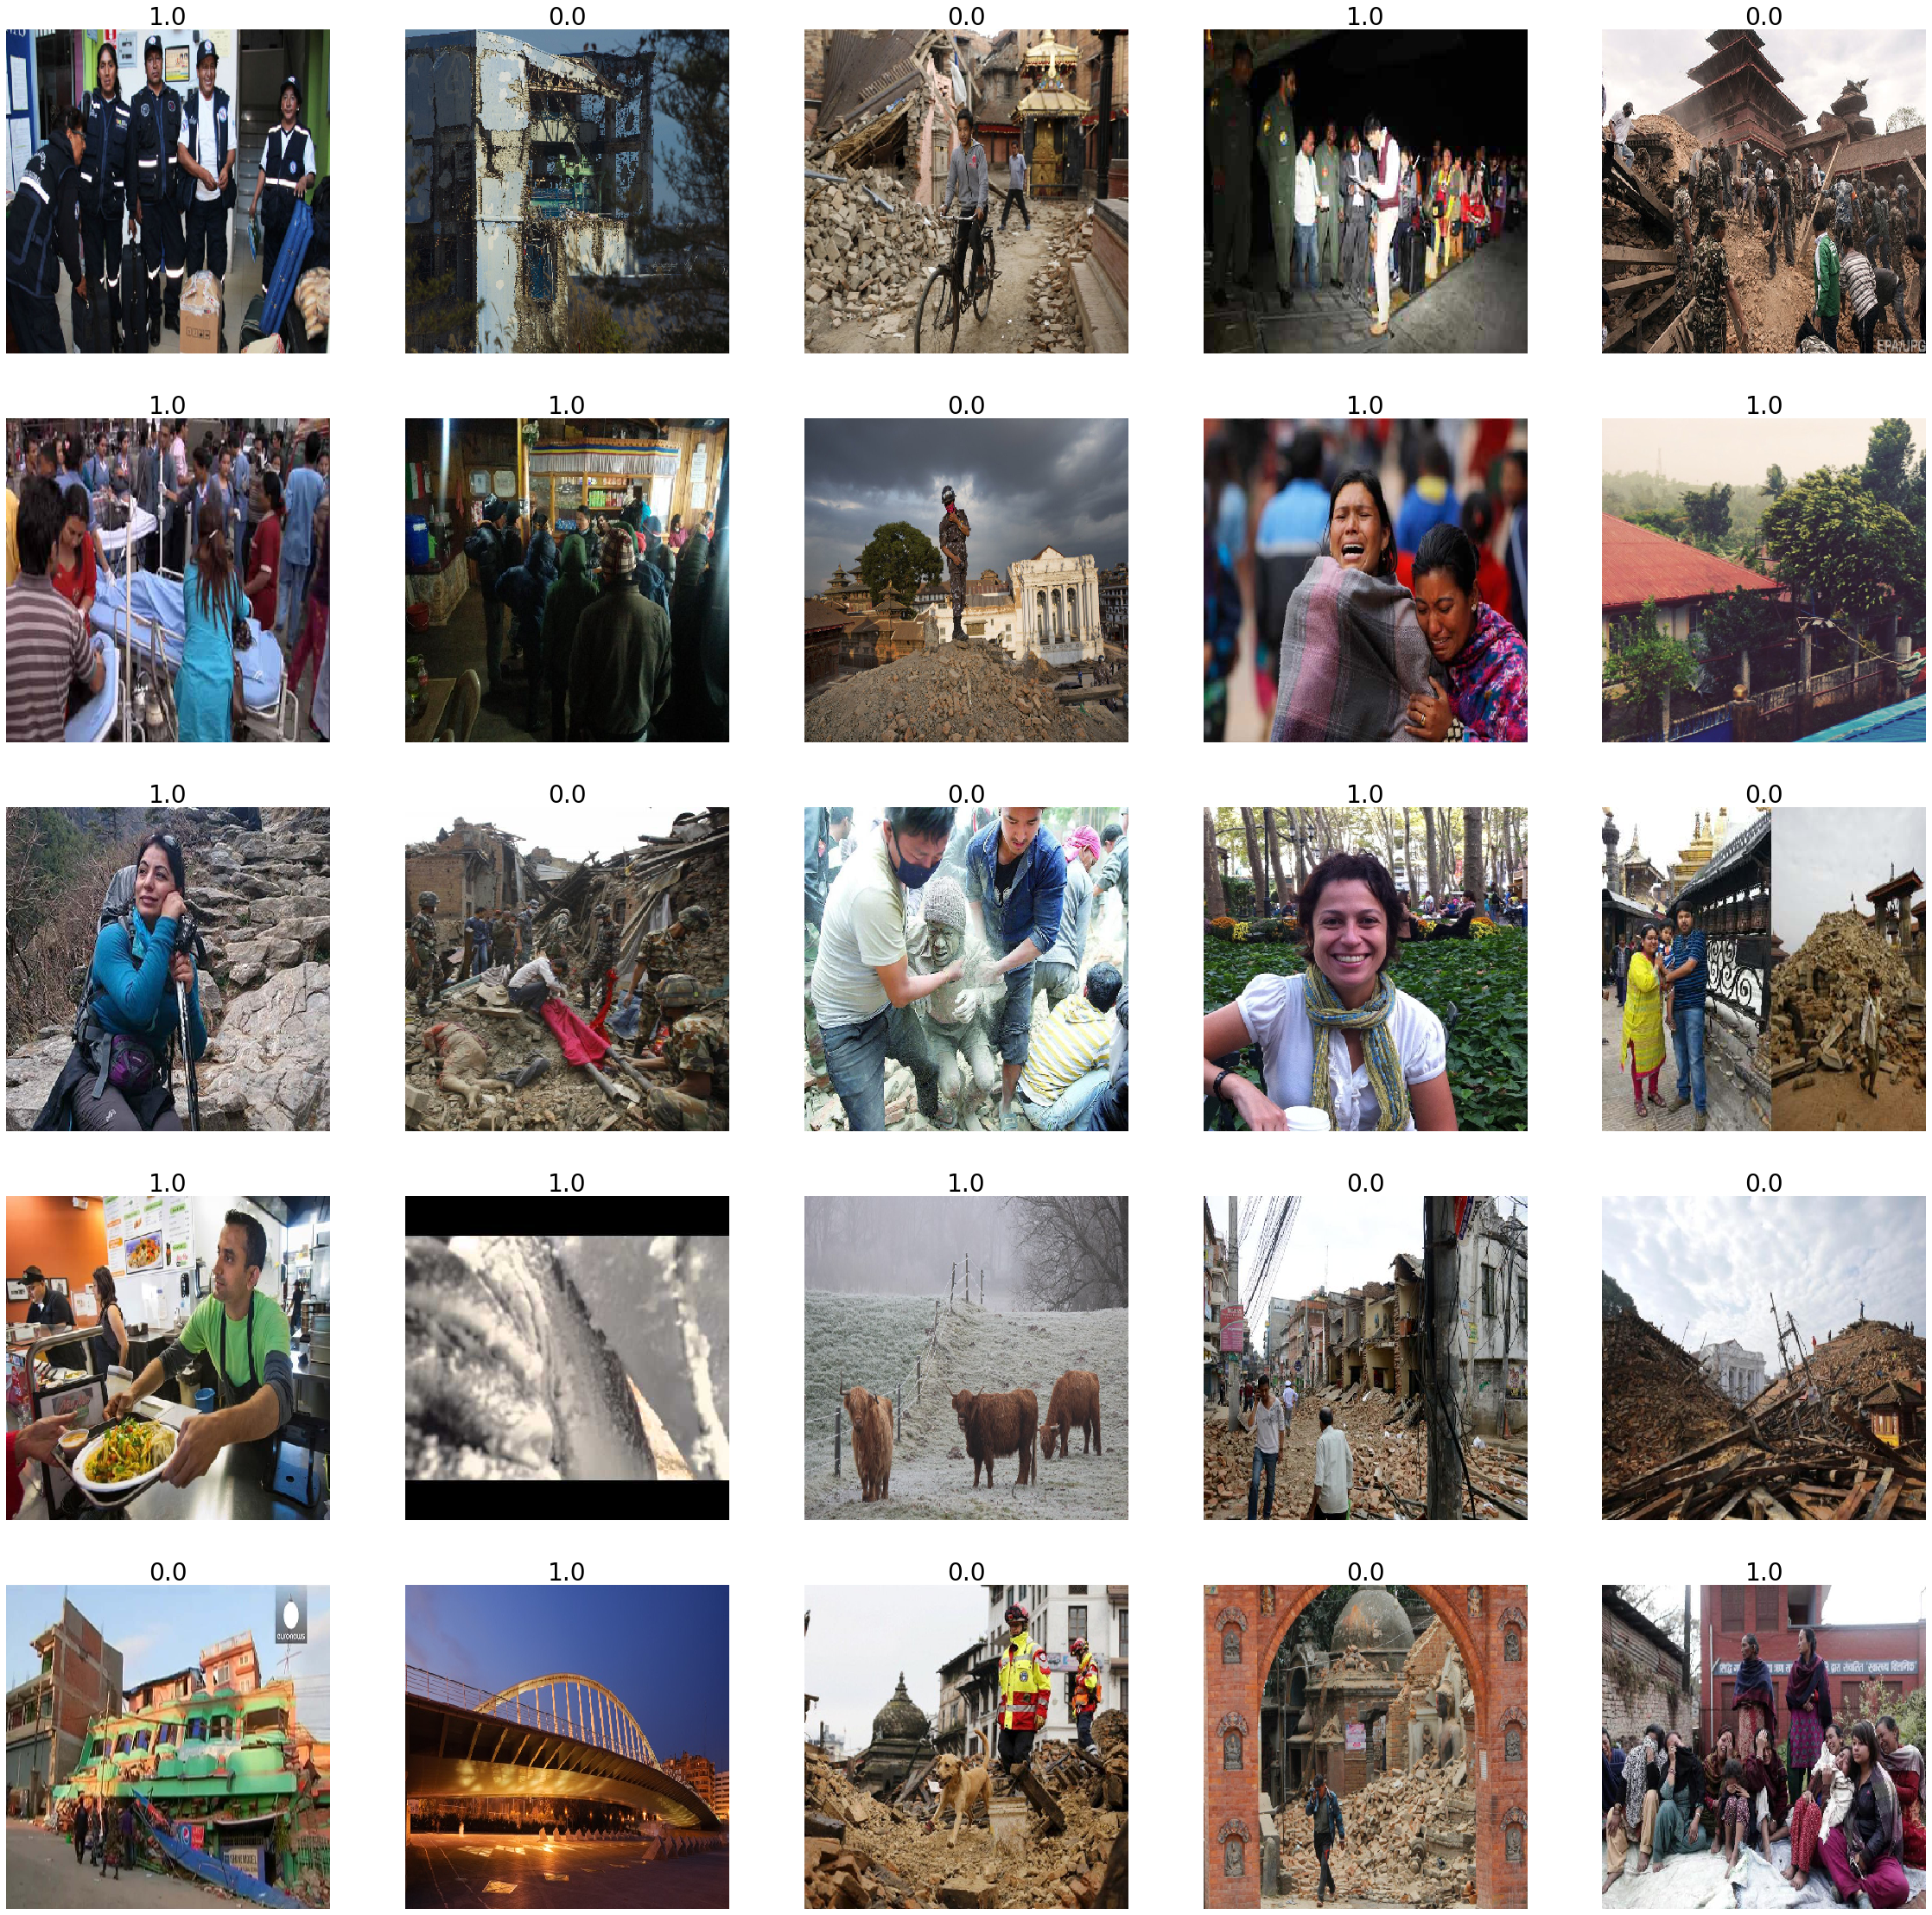

In [23]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [24]:
#train_data_gen.classes[:50]

In [25]:
label_batch

array([1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## NASNetLarge Pre-trained model ##

In [26]:
from keras.applications.nasnet import NASNetLarge
from keras.preprocessing import image
from keras.applications.nasnet import preprocess_input

Using TensorFlow backend.


In [27]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [28]:
from keras.callbacks import EarlyStopping

In [29]:
#callback = EarlyStopping(monitor='val_loss', patience=7)

callback = EarlyStopping(monitor='val_acc', patience=7, restore_best_weights=True)

In [30]:
base_model = NASNetLarge(weights='imagenet', include_top=False)

W1125 19:38:09.395929 139800124315456 deprecation_wrapper.py:119] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1125 19:38:09.397339 139800124315456 deprecation_wrapper.py:119] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1125 19:38:09.400071 139800124315456 deprecation_wrapper.py:119] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4479: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1125 19:38:09.419499 139800124315456 deprecation_wrapper.py:119] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_de

In [31]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_NasNet = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_NasNet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

W1125 19:38:42.817978 139800124315456 deprecation_wrapper.py:119] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [32]:
history_NasNet = model_NasNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    #callbacks=[callback, cp_callback]
    callbacks=[callback]
)

W1125 19:38:42.898526 139800124315456 deprecation.py:323] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15


/home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


121/121 [==============================] - 6559s 54s/step - loss: 0.9134 - acc: 0.7375 - val_loss: 1.3850 - val_acc: 0.6340
Epoch 2/15
121/121 [==============================] - 6475s 54s/step - loss: 0.4253 - acc: 0.8108 - val_loss: 0.4103 - val_acc: 0.8237
Epoch 3/15
121/121 [==============================] - 6473s 53s/step - loss: 0.3859 - acc: 0.8324 - val_loss: 0.4207 - val_acc: 0.8253
Epoch 4/15
121/121 [==============================] - 6485s 54s/step - loss: 0.3269 - acc: 0.8601 - val_loss: 0.3998 - val_acc: 0.8499
Epoch 5/15
121/121 [==============================] - 6523s 54s/step - loss: 0.2900 - acc: 0.8789 - val_loss: 0.7132 - val_acc: 0.7543
Epoch 6/15
121/121 [==============================] - 6470s 53s/step - loss: 0.2625 - acc: 0.8866 - val_loss: 0.8537 - val_acc: 0.7636
Epoch 7/15
121/121 [==============================] - 6450s 53s/step - loss: 0.2346 - acc: 0.9068 - val_loss: 0.7678 - val_acc: 0.7844
Epoch 8/15
121/121 [==============================] - 6497s 54s/st

In [33]:
# Save the entire model to a HDF5 file
#model_NasNet.save('data_all/NasNet_model_ALL.h5')


In [76]:
#model_NasNet.load_weights('NasNet/NasNet_model.h5')


#new_model_NasNet = tf.keras.models.load_model('NasNet/NasNet_model.h5')

## Visualize NasNetLarge model ##

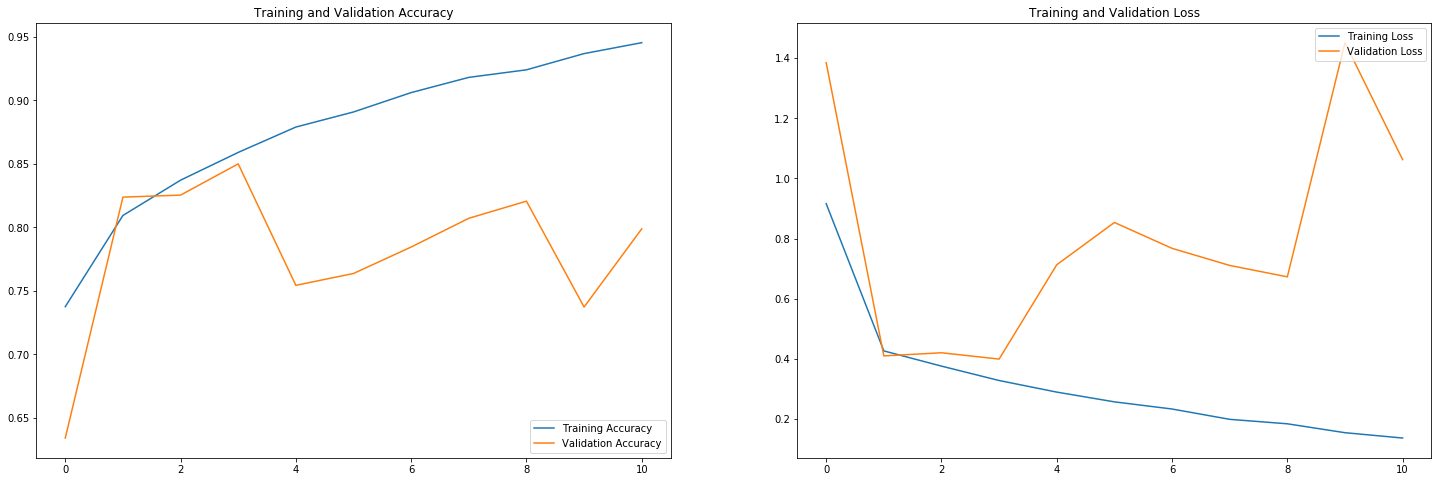

In [36]:
acc = history_NasNet.history['acc']
val_acc = history_NasNet.history['val_acc']

loss = history_NasNet.history['loss']
val_loss = history_NasNet.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of NasNet model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [37]:
test_loss, test_acc = model_NasNet.evaluate_generator(test_data_gen, verbose=0)

In [38]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8405656720353207


In [39]:
print('\nTest loss:', test_loss)


Test loss: 0.39545337070055314


## Make predictions on test data ##

### Let's make predictions on some images ###

In [40]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [41]:
predictions = model_NasNet.predict_generator(test_data_gen)

In [42]:
true_labels = test_data_gen.classes

In [43]:
predictions[0]

array([0.23041685, 0.76958317], dtype=float32)

In [44]:
np.argmax(predictions[0])

1

In [45]:
test_data_gen.classes[0]

0

In [46]:
predictions[-1]

array([0.01278457, 0.9872154 ], dtype=float32)

In [47]:
np.argmax(predictions[-1])

1

In [48]:
test_data_gen.classes[-1]

1

In [49]:
test_data_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## Confusion Matrix ##

In [69]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [51]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [52]:
cm = confusion_matrix(y_true, y_pred)

In [53]:
print(cm)

[[1933 1120]
 [1337  772]]


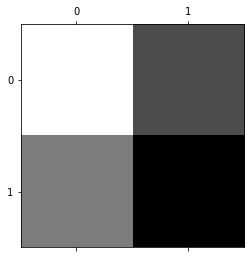

In [70]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

## Plot on Errors ##

In [71]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

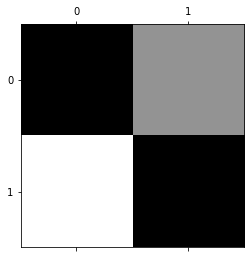

In [72]:
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.show()

## Confusion Matrix Heat Map ##

In [54]:
#!pip install seaborn

In [55]:
#import seaborn as sb

In [56]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of NasNet on test set ##

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61      3053
           1       0.41      0.37      0.39      2109

    accuracy                           0.52      5162
   macro avg       0.50      0.50      0.50      5162
weighted avg       0.52      0.52      0.52      5162



## Fine-tuning more layers in NASNetLarge ##

In [59]:
from keras.callbacks import EarlyStopping

In [60]:
#checkpoint_path = "NasNet/cp_2.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

In [61]:
# Create a callback that save the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [62]:
#callback = EarlyStopping(monitor='val_loss', patience=7)

callback = EarlyStopping(monitor='val_acc', patience=7, restore_best_weights=True)

In [63]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 stem_conv1
2 stem_bn1
3 activation_1
4 reduction_conv_1_stem_1
5 reduction_bn_1_stem_1
6 activation_2
7 activation_4
8 separable_conv_1_pad_reduction_left1_stem_1
9 separable_conv_1_pad_reduction_right1_stem_1
10 separable_conv_1_reduction_left1_stem_1
11 separable_conv_1_reduction_right1_stem_1
12 separable_conv_1_bn_reduction_left1_stem_1
13 separable_conv_1_bn_reduction_right1_stem_1
14 activation_3
15 activation_5
16 separable_conv_2_reduction_left1_stem_1
17 separable_conv_2_reduction_right1_stem_1
18 activation_6
19 separable_conv_2_bn_reduction_left1_stem_1
20 separable_conv_2_bn_reduction_right1_stem_1
21 separable_conv_1_pad_reduction_right2_stem_1
22 activation_8
23 reduction_add_1_stem_1
24 separable_conv_1_reduction_right2_stem_1
25 separable_conv_1_pad_reduction_right3_stem_1
26 activation_10
27 separable_conv_1_bn_reduction_right2_stem_1
28 separable_conv_1_reduction_right3_stem_1
29 separable_conv_1_reduction_left4_stem_1
30 activation_7
31 separable_conv_1_b

In [64]:
# we chose to train  blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model_NasNet.layers[:1031]:
   layer.trainable = False
for layer in model_NasNet.layers[1031:]:
   layer.trainable = True

In [65]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model_NasNet.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [66]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_NasNet_2 = model_NasNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=10,
    callbacks=[callback],
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
 17/121 [===>..........................] - ETA: 1:10:51 - loss: 0.3700 - acc: 0.8272

/home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


121/121 [==============================] - 6521s 54s/step - loss: 0.3327 - acc: 0.8504 - val_loss: 0.4648 - val_acc: 0.8221
Epoch 2/10
121/121 [==============================] - 6513s 54s/step - loss: 0.2799 - acc: 0.8821 - val_loss: 0.5232 - val_acc: 0.8041
Epoch 3/10
121/121 [==============================] - 6470s 53s/step - loss: 0.2652 - acc: 0.8939 - val_loss: 0.5399 - val_acc: 0.7956
Epoch 4/10
121/121 [==============================] - 6469s 53s/step - loss: 0.2613 - acc: 0.8961 - val_loss: 0.5617 - val_acc: 0.7936
Epoch 5/10
121/121 [==============================] - 6462s 53s/step - loss: 0.2577 - acc: 0.8942 - val_loss: 0.5736 - val_acc: 0.7894
Epoch 6/10
121/121 [==============================] - 6408s 53s/step - loss: 0.2569 - acc: 0.8950 - val_loss: 0.5827 - val_acc: 0.7920
Epoch 7/10
121/121 [==============================] - 6395s 53s/step - loss: 0.2569 - acc: 0.8944 - val_loss: 0.5853 - val_acc: 0.7940
Epoch 8/10
121/121 [==============================] - 6397s 53s/st

In [67]:
test_loss, test_acc = model_NasNet.evaluate_generator(test_data_gen, verbose=0)

In [68]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8211933360317796
